In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
birddata = pd.read_csv( 'bird_tracking.csv')
birddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [3]:
birddata.head()

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


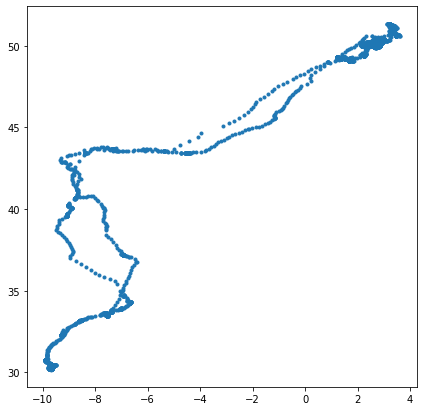

In [4]:
ix = birddata.bird_name == 'Eric'
x, y, = birddata.longitude[ix], birddata.latitude[ix]
plt.figure(figsize = (7,7))
plt.plot(x, y, '.')
plt.show()

In [5]:
bird_names = pd.unique(birddata.bird_name) #get bird names
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

### Plot Bird Flight Pattern

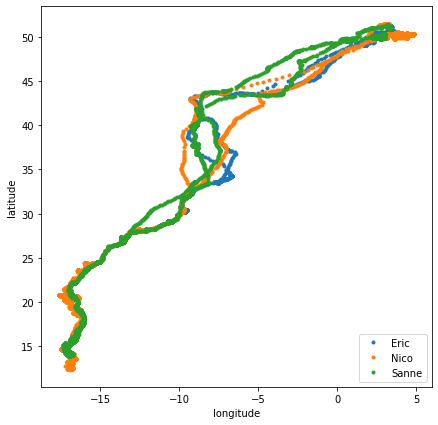

In [6]:
plt.figure(figsize = (7,7))
for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    x, y, = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x, y, '.', label = bird_name)
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend(loc = 'lower right')
plt.show()

### Plot Bird Flight Speed

/home/rohit/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/rohit/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


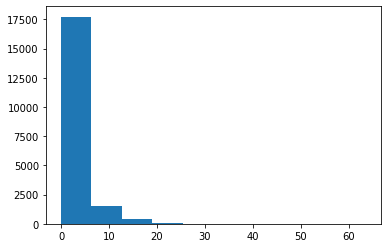

In [7]:
ix = birddata.bird_name == 'Eric'
speed = birddata.speed_2d[ix]
plt.hist(speed)
ind = np.isnan(speed)

In [8]:
ind = np.isnan(speed) #check for NaNs

~ind #bitwise compliment of ind array. Turns True to False and False to True

0        True
1        True
2        True
3        True
4        True
         ... 
19790    True
19791    True
19792    True
19793    True
19794    True
Name: speed_2d, Length: 19795, dtype: bool

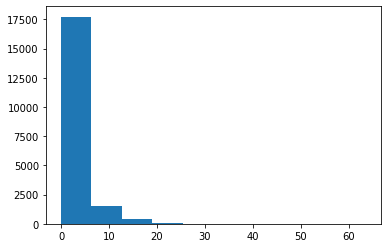

In [9]:
ix = birddata.bird_name == 'Eric'
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind]); #plot only if entry is not NaN
plt.show()

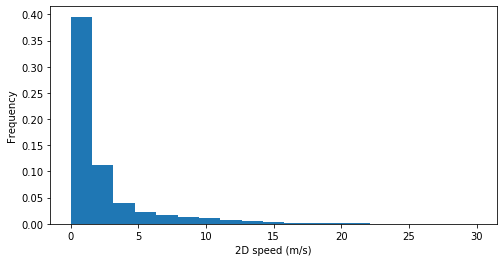

In [10]:
plt.figure(figsize=(8,4))
ix = birddata.bird_name == 'Eric'
speed = birddata.speed_2d[ix]
ind = np.isnan(speed)
plt.hist(speed[~ind], bins = np.linspace(0, 30, 20), density = True)
plt.xlabel('2D speed (m/s)')
plt.ylabel('Frequency')
plt.show()

### Histogram using Pandas

The Benifit of using pandas to plot the histogran is that we do not have to deal with NaNs explicitly

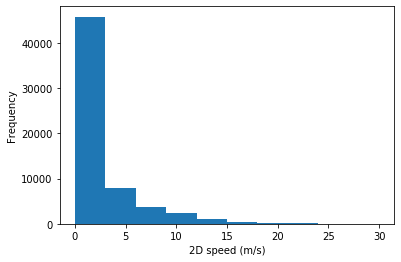

In [11]:
birddata.speed_2d.plot(kind = 'hist', range = [0, 30])
plt.xlabel('2D speed (m/s)')
plt.savefig('pd_hist.pdf')
plt.show()

### Extracting Timestamps Using datetime

In [12]:
datetime.datetime.today()

datetime.datetime(2020, 7, 12, 6, 31, 25, 793321)

In [13]:
time_1 = datetime.datetime.today()
time_2 = datetime.datetime.today()
time_2 - time_1

datetime.timedelta(microseconds=111)

In [14]:
date_str = birddata.date_time[0]
print(type(date_str))
date_str[:-3]

<class 'str'>


'2013-08-15 00:18:08'

In [15]:
datetime.datetime.strptime(date_str[:-3], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2013, 8, 15, 0, 18, 8)

In [16]:
timestamps = []
for k in range(len(birddata)): #Get timestamps in the form of datetime objects
    timestamps.append(datetime.datetime.strptime(birddata.date_time.iloc[k][:-3], "%Y-%m-%d %H:%M:%S"))

In [17]:
timestamps

[datetime.datetime(2013, 8, 15, 0, 18, 8),
 datetime.datetime(2013, 8, 15, 0, 48, 7),
 datetime.datetime(2013, 8, 15, 1, 17, 58),
 datetime.datetime(2013, 8, 15, 1, 47, 51),
 datetime.datetime(2013, 8, 15, 2, 17, 42),
 datetime.datetime(2013, 8, 15, 2, 47, 38),
 datetime.datetime(2013, 8, 15, 3, 2, 33),
 datetime.datetime(2013, 8, 15, 3, 17, 27),
 datetime.datetime(2013, 8, 15, 3, 32, 35),
 datetime.datetime(2013, 8, 15, 3, 47, 48),
 datetime.datetime(2013, 8, 15, 4, 3, 39),
 datetime.datetime(2013, 8, 15, 4, 18, 40),
 datetime.datetime(2013, 8, 15, 4, 33, 53),
 datetime.datetime(2013, 8, 15, 4, 49, 6),
 datetime.datetime(2013, 8, 15, 5, 4, 45),
 datetime.datetime(2013, 8, 15, 5, 20, 9),
 datetime.datetime(2013, 8, 15, 5, 35, 4),
 datetime.datetime(2013, 8, 15, 5, 49, 58),
 datetime.datetime(2013, 8, 15, 6, 4, 56),
 datetime.datetime(2013, 8, 15, 6, 19, 54),
 datetime.datetime(2013, 8, 15, 6, 34, 50),
 datetime.datetime(2013, 8, 15, 6, 49, 43),
 datetime.datetime(2013, 8, 15, 7, 4, 40)

In [18]:
#construct a pandas serries object to insert timestamp into birddata

birddata['timestamp'] = pd.Series(timestamps, index = birddata.index)
birddata

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42
...,...,...,...,...,...,...,...,...,...,...
61915,61915,11,2014-04-30 22:00:08+00,833,45.448157,51.352572,3.177151,0.208087,Sanne,2014-04-30 22:00:08
61916,61916,6,2014-04-30 22:29:57+00,833,-112.073055,51.352585,3.177144,1.522662,Sanne,2014-04-30 22:29:57
61917,61917,5,2014-04-30 22:59:52+00,833,69.989037,51.352622,3.177257,3.120545,Sanne,2014-04-30 22:59:52
61918,61918,16,2014-04-30 23:29:43+00,833,88.376373,51.354641,3.181509,0.592115,Sanne,2014-04-30 23:29:43


In [19]:
#create a list that captures the amount of time that has elapsed since the beginning of data collections
times = birddata.timestamp[birddata.bird_name == 'Eric']
elapsed_time = [time - times[0] for time in times]
elapsed_time

[Timedelta('0 days 00:00:00'),
 Timedelta('0 days 00:29:59'),
 Timedelta('0 days 00:59:50'),
 Timedelta('0 days 01:29:43'),
 Timedelta('0 days 01:59:34'),
 Timedelta('0 days 02:29:30'),
 Timedelta('0 days 02:44:25'),
 Timedelta('0 days 02:59:19'),
 Timedelta('0 days 03:14:27'),
 Timedelta('0 days 03:29:40'),
 Timedelta('0 days 03:45:31'),
 Timedelta('0 days 04:00:32'),
 Timedelta('0 days 04:15:45'),
 Timedelta('0 days 04:30:58'),
 Timedelta('0 days 04:46:37'),
 Timedelta('0 days 05:02:01'),
 Timedelta('0 days 05:16:56'),
 Timedelta('0 days 05:31:50'),
 Timedelta('0 days 05:46:48'),
 Timedelta('0 days 06:01:46'),
 Timedelta('0 days 06:16:42'),
 Timedelta('0 days 06:31:35'),
 Timedelta('0 days 06:46:32'),
 Timedelta('0 days 07:01:27'),
 Timedelta('0 days 07:16:23'),
 Timedelta('0 days 07:31:21'),
 Timedelta('0 days 07:46:48'),
 Timedelta('0 days 08:01:44'),
 Timedelta('0 days 08:16:39'),
 Timedelta('0 days 08:31:43'),
 Timedelta('0 days 08:46:55'),
 Timedelta('0 days 09:01:59'),
 Timedel

In [20]:
print(elapsed_time[1000] / datetime.timedelta(days = 1))  #calculate time in days

elapsed_time[1000] / datetime.timedelta(hours = 1)  #calculate time in hours

12.084722222222222


290.03333333333336

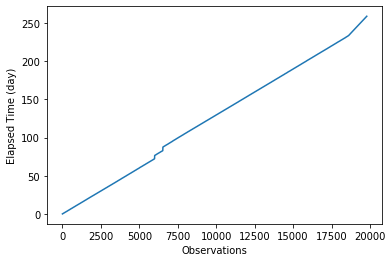

In [21]:
plt.plot(np.array(elapsed_time) / datetime.timedelta(days = 1))
plt.xlabel('Observations')
plt.ylabel('Elapsed Time (day)')
plt.show()

### Calculate Daily Mean Speed

In [22]:
data = birddata[birddata.bird_name == 'Eric']
times = data.timestamp

elapsed_time = [time - times[0] for time in times]
elapsed_days = np.array(elapsed_time)/ datetime.timedelta (days = 1)

elapsed_days

array([0.0, 0.02082175925925926, 0.04155092592592593, ...,
       258.9399652777778, 258.9607175925926, 258.9814930555556],
      dtype=object)

In [23]:
next_day = 1
inds = []
daily_mean_speed = []

for (i,t) in enumerate(elapsed_days):
    if t < next_day:
        inds.append(i)
    else:
        daily_mean_speed.append(np.mean(data.speed_2d[inds]))
        next_day += 1
        inds = []

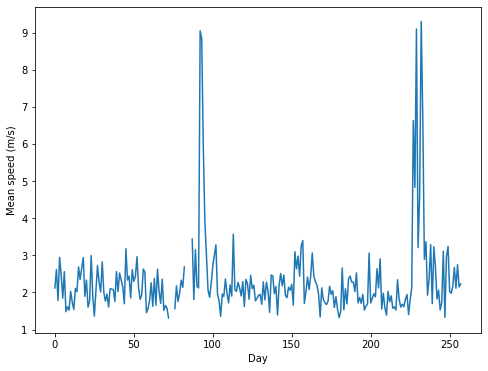

In [24]:
plt.figure(figsize = (8,6))
plt.plot(daily_mean_speed)
plt.xlabel('Day')
plt.ylabel('Mean speed (m/s)')
plt.show()

### Using the Cartopy Library

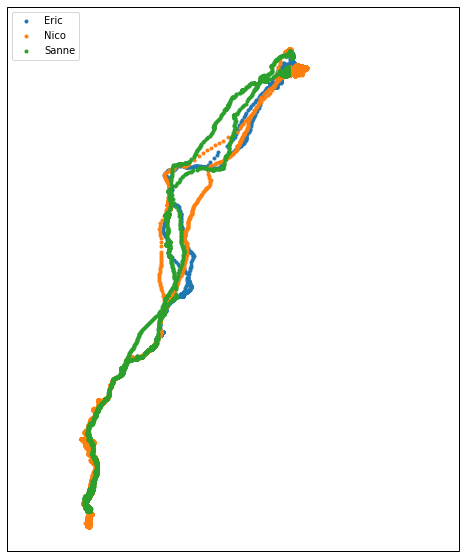

In [37]:
proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection = proj)
ax.set_extent((-25.0, 20.0, 52.0, 10.0))  #usually found by trial and error? check...

for name in bird_names:
    ix = birddata['bird_name'] == name
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x, y, '.', transform = ccrs.Geodetic(), label = name)
plt.legend(loc = 'upper left')
plt.show()

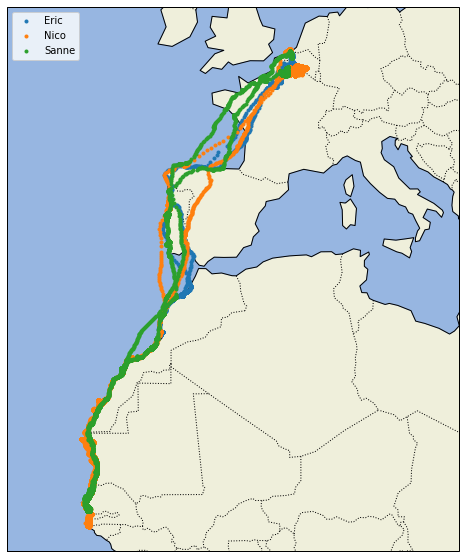

In [42]:
proj = ccrs.Mercator()
plt.figure(figsize=(10,10))
ax = plt.axes(projection = proj)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle = ':')
ax.set_extent((-25.0, 20.0, 52.0, 10.0))


for name in bird_names:
    ix = birddata['bird_name'] == name
    x,y = birddata.longitude[ix], birddata.latitude[ix]
    ax.plot(x, y, '.', transform = ccrs.Geodetic(), label = name)
plt.legend(loc = 'upper left')
plt.show()